In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import scipy.integrate as spi
import pylab as pl
import matplotlib as mlb
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.signal import savgol_filter
import operator
from pyDOE import *

In [2]:
data2=pd.read_csv("data2.csv")

In [3]:
alive1911=pd.read_csv("alivein1911.csv")

In [4]:
cause=pd.Series(data2['Cause of Death'])
measles=data2[cause.str.contains('measles')==True]
cause=pd.Series(alive1911['Cause of Death'])
measles1911=alive1911[cause.str.contains('measles')==True]

In [5]:
measles_only=np.array([])
for i in range(len(measles1911)):
    
    if measles1911['Cause of Death'].values[i]=='measles':
        measles_only=np.hstack((measles_only,measles1911['Deathdate'].values[i]))

In [6]:
measles_diarrhoea=np.array([])
for i in range(len(measles1911)):
    
    if measles1911['Cause of Death'].values[i]=='measles, diarrhoea':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i]))
    
    elif measles1911['Cause of Death'].values[i]=='measles, diahrroea':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i]))  
    elif measles1911['Cause of Death'].values[i]=='measles, ileo-colitis':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
    elif measles1911['Cause of Death'].values[i]=='measles, diarrhoea,\x0bheart failure':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
        
    elif measles1911['Cause of Death'].values[i]=='measles, diarrhoea,\x0bchildbirth':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
        
    elif measles1911['Cause of Death'].values[i]== 'measles, diarrhoea,\x0bmiscarriage':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
    
    elif measles1911['Cause of Death'].values[i]== 'measles, gastritis':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
        

In [7]:
measles_only=sorted(measles_only,key=lambda x: datetime.strptime(x, '%d/%m/%Y'))
measles_diar=sorted(measles_diarrhoea,key=lambda x: datetime.strptime(x, '%d/%m/%Y'))
deathmeasles=pd.unique(measles_diar)
daterange=pd.date_range(deathmeasles[0],deathmeasles[-1],freq='D')

In [8]:
values3=np.zeros(len(daterange))
deathtime3=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(measles_only)):
        if daterange[i]==datetime.strptime(measles_only[j],'%d/%m/%Y'):
            #print(i)
            #print(j)
            values3[i]=values3[i]+1

In [9]:
values2=np.zeros(len(daterange))
deathtime2=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(measles_diarrhoea)):
        if daterange[i]==datetime.strptime(measles_diarrhoea[j],'%d/%m/%Y'):
            #print(i)
            #print(j)
            values2[i]=values2[i]+1

In [10]:
measles_timeseries=np.hstack((np.zeros(30),values3,np.zeros(10)))
coinf_timeseries=np.hstack((np.zeros(30),values2,np.zeros(10)))
measles_timeseries2=np.hstack((np.zeros(10),values3,np.zeros(30)))
coinf_timeseries2=np.hstack((np.zeros(10),values2,np.zeros(30)))
measles_timeseries3=np.hstack((np.zeros(1),values3,np.zeros(39)))
coinf_timeseries3=np.hstack((np.zeros(1),values2,np.zeros(39)))

In [11]:
measles_only=pd.read_csv("measles_only_file.csv")
measles_diar=pd.read_csv("measles_diar_file.csv")

In [6]:
pd.unique(cause)

array([nan, 'pneumonia', 'undiagnosed', 'drowned', 'cardiac failure',
       'convulsions', 'asthma, nitral stenosis', 'bronchitis', 'influenza',
       'diarrhoea', 'stillborn', 'car accident', 'tuberculosis',
       'gangrene', 'dysentery', 'measles', 'pericerditis',
       'whooping cough', 'debility', 'cardiac disease', 'tubercular gland',
       'measles, diarrhoea', 'gastro-enteritis', 'tetanus',
       'gastro-enteritis, yaws', 'cancer of uterus', 'peritonitis',
       'indigestion', 'inanition', 'neglect (illness of Mo)', 'meningitis',
       'influenza, bronchitis', 'pneumonia, malnutrition',
       'gastritis, convulsions', 'tubercular peritonitis +',
       'myocardial failure', ' peritonitis',
       'influenza, malnutrition, cardiac failure',
       'whooping cough, bronchitis, pneumonia, convulsions',
       'pemature birth', 'accident: torpedo explosion',
       'influenza, pneumonia', 'diphtheria', 'collapse after operation',
       'hemolytic disease', 'malnutrition, b

In [12]:
tb_cases=data2[cause.str.contains('tubercul')==True]
phthisis_cases=data2[cause.str.contains('phthisis')==True]


In [11]:
cause[cause.str.contains('phthisis')==True]

953                         phthisis
1106                        phthisis
1108                        phthisis
1606                        phthisis
1611                        phthisis
1620                        phthisis
4204                        phthisis
4759                        phthisis
4998                        phthisis
5029                        phthisis
5044                        phthisis
5109             phthisis, pneumonia
5358                        phthisis
5416                        phthisis
5557                        phthisis
5565                        phthisis
5701                        phthisis
5705                        phthisis
5846                        phthisis
5857                        phthisis
5872                        phthisis
6057                        phthisis
6084                        phthisis
6086                        phthisis
6154                        phthisis
6426                        phthisis
6448                        phthisis
6

In [9]:
tb_cases

70                  tuberculosis
108                 tuberculosis
129                 tuberculosis
154                 tuberculosis
159                 tuberculosis
161             tubercular gland
165                 tuberculosis
266     tubercular peritonitis +
319                 tuberculosis
322                 tuberculosis
509                 tuberculosis
521                 tuberculosis
556                 tuberculosis
579                 tuberculosis
623                 tuberculosis
632                 tuberculosis
719                 tuberculosis
745                 tuberculosis
767                 tuberculosis
786                 tuberculosis
787                 tuberculosis
788                 tuberculosis
905                 tuberculosis
936                 tuberculosis
1016                tuberculosis
1019                tuberculosis
1097                tuberculosis
1255                tuberculosis
1301                tuberculosis
1317                tuberculosis
          

In [20]:
death_tb=tb_cases["Deathdate"].values
death_tb=sorted(death_tb, key=lambda x: datetime.strptime(x, '%d/%m/%Y'))
uniq_death_tb=pd.unique(death_tb)
daterange=pd.date_range(uniq_death_tb[0],uniq_death_tb[-1],freq='D')
values=np.zeros(len(daterange))
deathtime=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(death_tb)):
        if daterange[i]==datetime.strptime(death_tb[j],'%d/%m/%Y'):
            #print(i)
            #print(j)
            values[i]=values[i]+1
    deathtime[i]=mlb.dates.date2num(daterange[i])

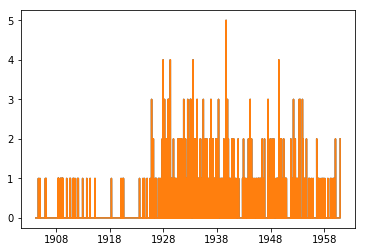

In [21]:
plt.plot_date(deathtime,values,'-',label="Deaths from Tuberculosis")
plt.show()

In [11]:


def coinf_model(INP,t):  

    #Y=np.zeros((8))
    Y=np.zeros((10))
    V = INP    
    #SS
    Y[0]=-beta0*V[0]*(V[1]+V[3]+V[5]+V[7])-beta1*V[0]*(V[2]+V[3])+gamma0*V[1]
    
 
    #IS 0 pathogen
    Y[1]=beta0*V[0]*(V[1]+V[3]+V[5]+V[7])-beta1*V[1]*(V[2]+V[3])-gamma0*V[1]
    
    
    #SI 1 measles
    Y[2]=beta1*V[0]*(V[2]+V[3])-beta0*V[2]*(V[1]+V[3]+V[5]+V[7])-omega[0]*V[2]+gamma0*V[3]-mu[0]*V[2]
    
    
    #II 0 and 1 measles and pathogen
    Y[3]=beta0*V[2]*(V[1]+V[3]+V[5]+V[7])+beta1*V[1]*(V[2]+V[3])-gamma0*V[3]-omega[1]*V[3]-mu[1]*V[3]
    
    

    #SX immunosuppressed
    Y[4]=omega[0]*V[2]-gamma1*V[4]+gamma0*V[5]-beta0*V[4]*(V[1]+V[3]+V[5]+V[7])
    

    
    #IX
    Y[5]=omega[1]*V[3]+beta0*V[4]*(V[1]+V[3]+V[5]+V[7])-gamma1*V[5]-mu[2]*V[5]-gamma0*V[5]
    

    #SR
    Y[6]=gamma1*V[4]+gamma0*V[7]-beta0*V[6]*(V[1]+V[3]+V[5]+V[7])
    
   
    
    #IR
    Y[7]=beta0*V[6]*(V[1]+V[3]+V[5]+V[7])+gamma1*V[5]-gamma0*V[7]
    
    Y[8]=mu[0]*V[2]
    Y[9]=mu[1]*V[3]+mu[2]*V[5]

    
    return Y   # For odeint



In [37]:
N=1e3
beta=np.array([1.0/N,1.0/N])
#c=1/100
c=1/3.5
mu=np.array([c/14,c/14,2*c/30])

omega=np.array([1/14,1/14])
gamma0=1/3
gamma1=1/30


IS0=650
SI0=1
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SI0
INPUT=(SS0,IS0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
TS=1.0
ND=100.0
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(coinf_model,INPUT,t_range)


In [3]:
N=1e3
beta=np.array([0.35/N,0.4/N])
#c=1/100
c=1/2
mu=np.array([c/24,c/24,c/50])

omega=np.array([1/24,1/24])
gamma0=1/10
gamma1=1/50


IS0=650
SI0=1
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SI0
INPUT=(SS0,IS0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
TS=1.0
ND=200.0
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(coinf_model,INPUT,t_range)


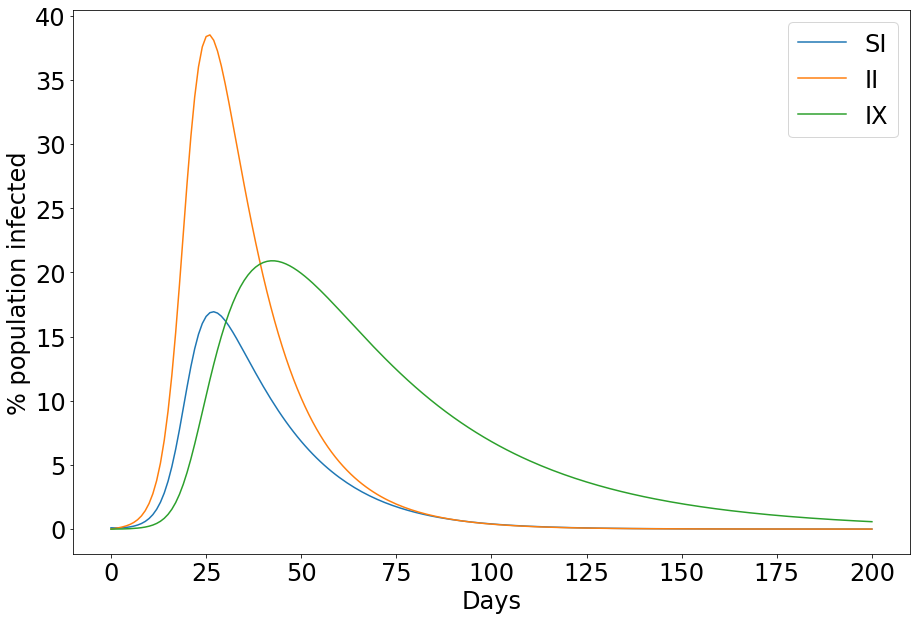

In [8]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 24})
# #plt.plot(RES[:,0],label="SS")
#plt.plot(RES[:,1],label="IS-mystery pathogen alone")
plt.plot(RES[:,2]/1e1,label=("SI"))

plt.plot(RES[:,3]/1e1,label=("II"))
#plt.plot(RES[:,4],label=("SX"))
plt.plot(RES[:,5]/1e1,label=("IX"))
# #plt.plot(RES[:,6],label=("SR"))
# #plt.plot(RES[:,7],label=("IR"))
#plt.plot(RES[1:100,8]-RES[0:99,8],label=("SI-only measles"))
#plt.plot(RES[1:100,9]-RES[0:99,9],label=("coinfected"))
plt.xlabel('Days')
plt.ylabel('% population infected')
plt.legend()
plt.show()

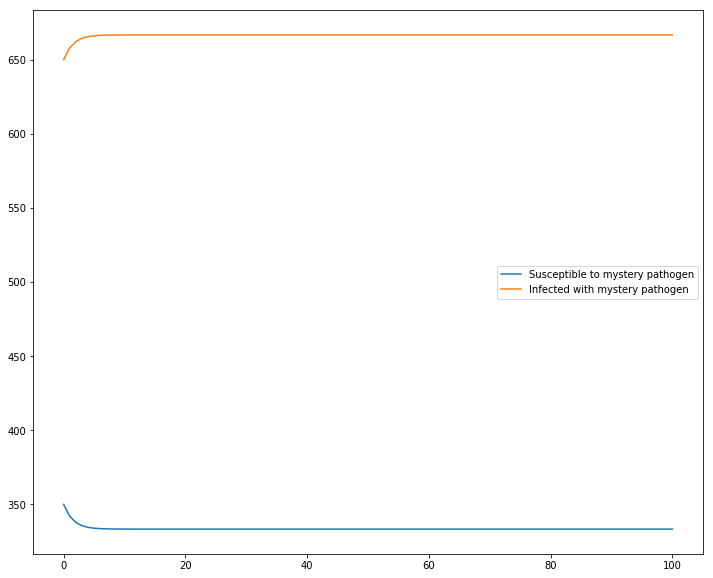

In [128]:
plt.figure(figsize=(12,10))
plt.plot(RES[:,0]+RES[:,2]+RES[:,4]+RES[:,6],label="Susceptible to mystery pathogen")
plt.plot(RES[:,1]+RES[:,3]+RES[:,5]+RES[:,7],label="Infected with mystery pathogen")
plt.legend()
plt.show()

In [61]:
beta_m=1/1e3
beta_d=0.7/1e3
beta_im=1/1e3

sigma=1/14.0
mu=1/30
gamma_m=1/7.0
gamma_d=1/4.0

TS=1.0
N=1e3

Id0=600
Im0=1
S0=N-Id0-Im0
X0=0
Idm0=0
R0=0
ND=365.0
INPUT = (S0, Id0, Im0,X0,Idm0,R0)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(coinf_model,INPUT,t_range)


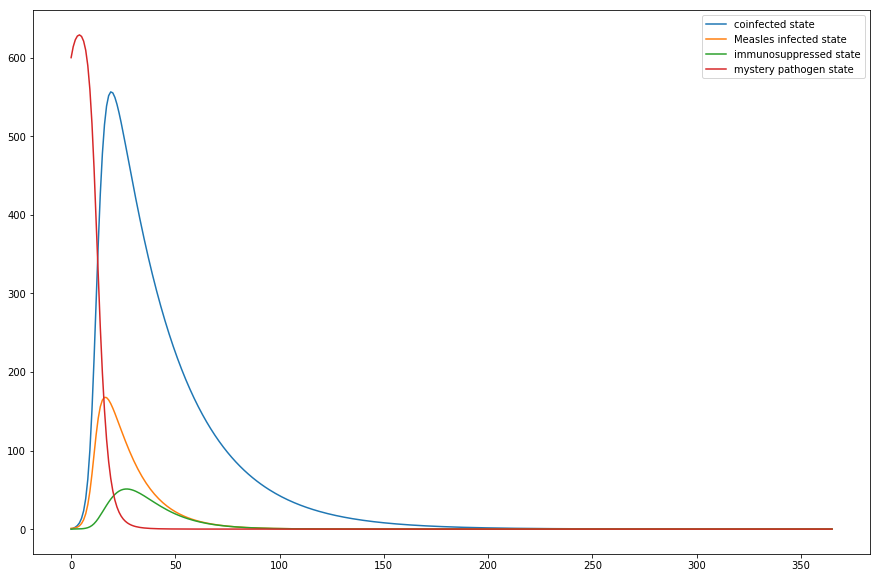

In [62]:
plt.figure(figsize=(15,10))
plt.plot(RES[:,4],label='coinfected state')
plt.plot(RES[:,2],label='Measles infected state')
plt.plot(RES[:,3],label='immunosuppressed state')
plt.plot(RES[:,1],label='mystery pathogen state')
plt.legend()
plt.show()

In [9]:
np.shape(RES)

(366, 6)

In [12]:
def seir_model(INP,t,ps):
    try:
        
        beta1=ps['beta1'].value
#     beta=np.hstack((ps['beta0'].value,ps['beta1'].value))
        
        gamma1=ps['gamma1'].value
        d=ps['d'].value
        
        sigma=ps['sigma'].value
        
        
    except:
        beta1,gamma1,d,sigma=ps
    N=2618
    
    Y=np.zeros((5))
    
    V = INP   
    
    #susceptible
    Y[0]=-(beta1/N)*V[0]*V[2]
    
    #exposed
    Y[1]=(beta1/N)*V[0]*V[2]-sigma*V[1]
    
    #infected
    Y[2]=sigma*V[1]-d*V[2]-gamma1*V[2]
    
    #recovered
    Y[3]=gamma1*V[2]
    
    #dead
    Y[4]=d*V[2]
    
    return Y
    
    
    

In [13]:
def coinf_exp1_model(INP,t):  
#     try:
#         beta0=ps['beta0'].value
#         beta1=ps['beta1'].value
# #     beta=np.hstack((ps['beta0'].value,ps['beta1'].value))
#         gamma0=ps['gamma0'].value
#         gamma1=ps['gamma1'].value
#         c=ps['c'].value
#     except:
#         beta0,beta1,gamma0,gamma1,c=ps
        
#     mu=np.array([c/10,c/10,c*gamma1])
#     beta=np.hstack((beta0,beta1))
    
    Y=np.zeros((12))
    V = INP    
    #SS
    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[0]*(V[4]+V[5])+gamma0*V[1]
    
 
    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[1]*(V[4]+V[5])-gamma0*V[1]
    
    #SE 1 measles
    
    Y[2]=beta[1]*V[0]*(V[4]+V[5])-sigma*V[2]-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma0*V[3]
    
    #IE
    
    Y[3]= beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma0*V[3]-sigma*V[3]+beta[1]*V[1]*(V[4]+V[5])
    
    #SI 1 measles
    Y[4]=sigma*V[2]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])-omega[0]*V[4]+gamma0*V[5]-mu[0]*V[4]
    
    
    #II 0 and 1 measles and pathogen
    Y[5]=beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])+sigma*V[3]-gamma0*V[5]-omega[1]*V[5]-mu[1]*V[5]
    
    

    #SX immunosuppressed
    Y[6]=omega[0]*V[2]-gamma1*V[6]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])
    

    
    #IX
    Y[7]=omega[1]*V[5]+beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma1*V[7]-mu[2]*V[7]-gamma0*V[7]
    

    #SR
    Y[8]=gamma1*V[6]+gamma0*V[9]-beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])
    
   
    
    #IR
    Y[9]=beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma1*V[7]-gamma0*V[9]
    
    Y[10]=mu[0]*V[4]
    Y[11]=mu[1]*V[5]+mu[2]*V[7]

    
    return Y   # For odeint



In [14]:
def coinf_exp_model(INP,t,ps):  
    try:
        beta0=ps['beta0'].value
        beta1=ps['beta1'].value
#     beta=np.hstack((ps['beta0'].value,ps['beta1'].value))
        gamma0=ps['gamma0'].value
        gamma1=ps['gamma1'].value
        c1=ps['c1'].value
        c2=ps['c2'].value
        c3=ps['c3'].value
        sigma=ps['sigma'].value
        omega0=ps['omega0'].value
        omega1=ps['omega1'].value
        #alpha0=ps['alpha0'].value
        #alpha1=ps['alpha1'].value
    except:
        beta0,beta1,gamma0,gamma1,c=ps
    N=2618
    #omega0=1
    omega=np.hstack((omega0,omega0))
    #mu=np.array([c1,0,0])
    mu=np.array([c1*omega[0],c2*omega[1],c2*gamma1])
    beta=np.hstack((beta0/N,beta1/N))
    #alpha=np.array([alpha0,alpha1])
    #alpha=np.array([0,0])
    Y=np.zeros((12))
    V = INP    
    #SS
    
    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[0]*(V[4]+V[5])+gamma0*V[1]
    
 
    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[1]*(V[4]+V[5])-gamma0*V[1]
    
    #SE 1 measles
    
    Y[2]=beta[1]*V[0]*(V[4]+V[5])-sigma*V[2]-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma0*V[3]
    
    #IE
    
    Y[3]= beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma0*V[3]-sigma*V[3]+beta[1]*V[1]*(V[4]+V[5])
    
    #SI 1 measles
    Y[4]=sigma*V[2]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])-omega[0]*V[4]+gamma0*V[5]-mu[0]*V[4]
    
    
    #II 0 and 1 measles and pathogen
    Y[5]=beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])+sigma*V[3]-gamma0*V[5]-omega[1]*V[5]-mu[1]*V[5]
    
    

    #SX immunosuppressed
    #Y[6]=alpha[0]*
    Y[6]=omega[0]*V[4]-gamma1*V[6]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])
    

    
    #IX
    #Y[7]=alpha[1]*
    Y[7]=omega[1]*V[5]+beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma1*V[7]-mu[2]*V[7]-gamma0*V[7]
    

    #SR
    #Y[8]=(1-alpha[0])*
    Y[8]=omega[0]*V[4]+gamma1*V[6]+gamma0*V[9]-beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])
    
   
    
    #IR
    #Y[9]=(1-alpha[1])*
    
    Y[9]=omega[1]*V[5]+beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma1*V[7]-gamma0*V[9]
    
    Y[10]=mu[0]*V[4]
    Y[11]=mu[1]*V[5]+mu[2]*V[7]

    
    return Y   # For odeint


In [15]:
def coinf_sirs_model(INP,t,ps):  
    try:
        beta0=ps['beta0'].value
        beta1=ps['beta1'].value
#     beta=np.hstack((ps['beta0'].value,ps['beta1'].value))
        gamma0=ps['gamma0'].value
        gamma1=ps['gamma1'].value
        c1=ps['c1'].value
        c2=ps['c2'].value
        c3=ps['c3'].value
        c4=ps['c4'].value
        sigma=ps['sigma'].value
        omega=ps['omega'].value
        delta0=ps['delta0'].value

    except:
        beta0,beta1,gamma0,gamma1,c1,c2,c3,c4,sigma,omega,delta0=ps
    N=2618
    
    mu=np.array([c1*omega,c2*omega,c3*omega,c4*gamma1])
    beta=np.hstack((beta0/N,beta1/N))

    
    Y=np.zeros((17))
    V = INP    
    
    infect_0=(V[1]+V[4]+V[7]+V[10]+V[13])
    infect_1=(V[6]+V[7]+V[8])
    
    
    Y[0]=-beta1*V[0]*infect_1-beta0*V[0]*infect_0+delta0*V[2]

    Y[1]=-beta1*V[1]*infect_1+beta0*V[0]*infect_0-gamma0*V[1]

    Y[2]=-beta1*V[2]*infect_1+gamma0*V[1]-delta0*V[2]



    Y[3]=beta1*V[0]*infect_1-sigma*V[3]-beta0*V[3]*infect_0+delta0*V[5]

    Y[4]=beta1*V[1]*infect_1-sigma*V[4]+beta0*V[3]*infect_0-gamma0*V[4]

    Y[5]=beta1*V[2]*infect_1-sigma*V[5]+gamma0*V[4]-delta0*V[5]



    Y[6]=sigma*V[3]-mu[0]*V[6]-omega*Y[6]-beta0*V[6]*infect_0+delta0*V[8]

    Y[7]=sigma*V[4]-mu[1]*V[7]-omega*Y[6]+beta0*V[6]*infect_0-gamma0*V[7]

    Y[8]=sigma*V[5]-mu[2]*V[8]-omega*Y[6]+gamma0*V[7]-delta0*V[8]



    Y[9]=omega*Y[6]-gamma1*Y[9]-beta0*V[9]*infect_0+delta0*V[11]

    Y[10]=omega*Y[7]-gamma1*Y[9]-mu[3]*V[10]+beta0*V[9]*infect_0-gamma0*V[10]

    Y[11]=omega*Y[8]-gamma1*Y[11]+gamma0*V[10]-delta0*V[11]



    Y[12]=gamma1*Y[9]-beta0*V[12]*infect_0+delta0*V[14]

    Y[13]=gamma1*Y[10]+beta0*V[12]*infect_0-gamma0*V[13]

    Y[14]=gamma1*Y[11]+gamma0*V[13]-delta0*V[14]



    Y[15]=mu[0]*V[6]+mu[2]*V[8]
    Y[16]=mu[1]*V[7]+mu[3]*V[10]

    
    return Y   # For odeint


In [100]:
#N=1e3
N=2618
beta=np.array([0.5/N,2.0/N])
#beta=np.array([beta_range[9]/N,beta_range[1]/N])
gamma1=0.01
#gamma1_range[2]
#c=mort_range[0]
c=1/20
mu=np.array([c/10,c/10,c*gamma1])
#c=1/100
# c=1/1
# #c=0
# mu=np.array([c/10,c/10,c/30])

omega=np.array([1/10,1/10])
gamma0=1/10
#gamma1=1/30
sigma=1/14

IS0=650
SE0=1
IE0=0
SI0=0
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
TS=1.0
ND=200.0
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(coinf_exp1_model,INPUT,t_range)


In [108]:
res_measles=RES[1:(res_len+1),10]-RES[0:res_len,10]
#res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]

In [114]:
index, value = max(enumerate(res_measles), key=operator.itemgetter(1))

In [115]:
index

40

In [116]:
res_measles[40]

0.67197856959809954

In [113]:
max_value = max(res_measles)
max_index = res_measles.index(max_value)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [109]:
max(res_measles)

0.67197856959809954

In [90]:
334/2618

0.12757830404889228

In [54]:
mort_runs=10
beta_runs=10
gamma1_runs=10
gamma0_runs=10
RES=np.zeros((152,12,beta_runs,beta_runs,gamma1_runs,mort_runs,gamma0_runs))
gamma1_range=1/np.linspace(10,80,gamma_runs)
gamma0_range=1/np.linspace(1,25,gamma0_runs)
beta_range=np.linspace(0.05,5,beta_runs)
mort_range=np.linspace(0.0001,0.5,mort_runs)
diff_meas=np.zeros((beta_runs,beta_runs,gamma_runs,mort_runs,gamma0_runs))
diff_coinf=np.zeros((beta_runs,beta_runs,gamma_runs,mort_runs,gamma0_runs))

N=2618
omega=np.array([1/10,1/10])
gamma0=1/10
sigma=1/14

for i in range(beta_runs):
    for j in range(beta_runs):
        beta=np.array([beta_range[i]/N,beta_range[j]/N])
        for k in range(gamma_runs):
            gamma1=gamma1_range[k]
            for l in range(mort_runs):
                c=mort_range[l]
                mu=np.array([c/10,c/10,c*gamma1])
                for m in range(gamma0_runs):
                    gamma0=gamma0_range[m]
                
                    IS0=650
                    SE0=1
                    IE0=0
                    SI0=0
                    II0=0
                    SX0=0
                    IX0=0
                    SR0=0
                    IR0=0
                    SS0=N-IS0-SE0
                    INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
                    TS=1.0
                    ND=151.0
                    t_start = 0.0; t_end = ND; t_inc = TS
                    t_range = np.arange(t_start, t_end+t_inc, t_inc)
                    RES[:,:,i,j,k,l,m] = spi.odeint(coinf_exp_model,INPUT,t_range)
                    res_measles=RES[1:151,10,i,j,k,l,m]-RES[0:150,10,i,j,k,l,m]
                    res_coinf=RES[1:151,11,i,j,k,l,m]-RES[0:150,11,i,j,k,l,m]
                    diff_meas[i,j,k,l,m]=sum(abs(measles_timeseries3-res_measles))
                    diff_coinf[i,j,k,l,m]=sum(abs(coinf_timeseries3-res_coinf))
                


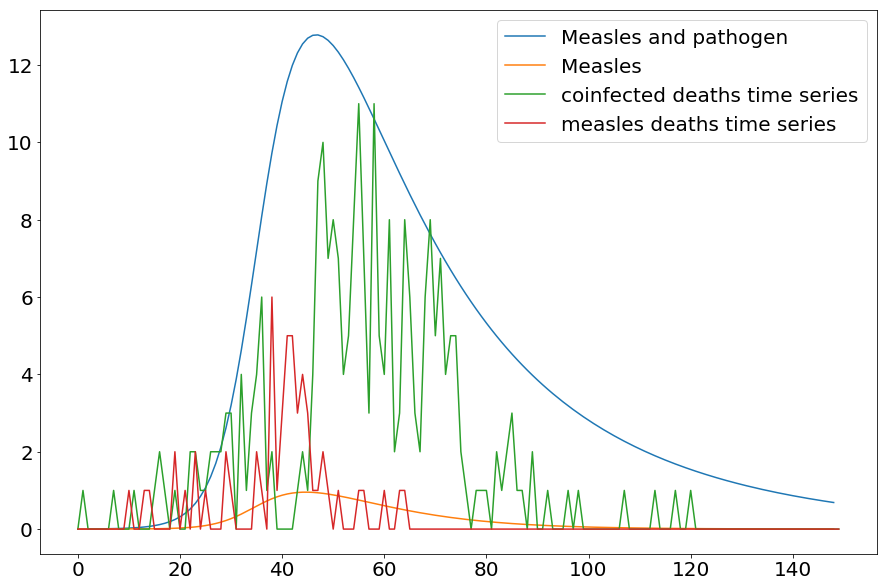

In [50]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
j=3
k=4
l=3
# for i in range(beta_runs):
#     #plt.plot(RES[1:150,10,i,j,k,l]-RES[0:149,10,i,j,k,l],label="Measles")
#     plt.plot(RES[1:150,11,i,j,k,l]-RES[0:149,11,i,j,k,l],label="Measles and pathogen")
i=2
plt.plot(RES[1:150,11,i,j,k,l]-RES[0:149,11,i,j,k,l],label="Measles and pathogen")
plt.plot(RES[1:150,10,i,j,k,l]-RES[0:149,10,i,j,k,l],label="Measles")
#plt.plot(coinf_timeseries3)
plt.plot(coinf_timeseries3,label="coinfected deaths time series")
plt.plot(measles_timeseries3,label="measles deaths time series")
plt.legend()
plt.show()

In [149]:
# def f(xs, t, ps):
#     """Lotka-Volterra predator-prey model."""
#     try:
#         a = ps['a'].value
#         b = ps['b'].value
#         c = ps['c'].value
#         d = ps['d'].value
#     except:
#         a, b, c, d = ps

#     x, y = xs
#     return [a*x - b*x*y, c*x*y - d*y]

# def g(t, x0, ps):
#     """
#     Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
#     """
#     x = spi.odeint(f, x0, t, args=(ps,))
#     return x

# def residual(ps, ts, data):
#     x0 = ps['x0'].value, ps['y0'].value
#     model = g(ts, x0, ps)
#     return (model - data).ravel()

# t = np.linspace(0, 10, 100)
# x0 = np.array([1,1])

# a, b, c, d = 3,1,1,1
# true_params = np.array((a, b, c, d))
# data = g(t, x0, true_params)
# data += np.random.normal(size=data.shape)

# # set parameters incluing bounds
# params = Parameters()
# params.add('x0', value= float(data[0, 0]), min=0, max=10)
# params.add('y0', value=float(data[0, 1]), min=0, max=10)
# params.add('a', value=2.0, min=0, max=10)
# params.add('b', value=1.0, min=0, max=10)
# params.add('c', value=1.0, min=0, max=10)
# params.add('d', value=1.0, min=0, max=10)

# # fit model and find predicted values
# result = minimize(residual, params, args=(t, data), method='leastsq')
# final = data + result.residual.reshape(data.shape)

# # plot data and fitted curves
# plt.plot(t, data, 'o')
# plt.plot(t, final, '-', linewidth=2);

# # display fitted statistics
# report_fit(result)

In [183]:
measles_ts_smooth = savgol_filter(measles_timeseries, 21, 3)


In [50]:
measles_timeseries=np.hstack((np.zeros(29),values3,np.zeros(3)))
coinf_timeseries=np.hstack((np.zeros(29),values2,np.zeros(3)))
measles_timeseries2=np.hstack((np.zeros(10),values3,np.zeros(30)))
coinf_timeseries2=np.hstack((np.zeros(10),values2,np.zeros(30)))
measles_timeseries3=np.hstack((np.zeros(1),values3,np.zeros(39)))
coinf_timeseries3=np.hstack((np.zeros(1),values2,np.zeros(39)))

In [119]:
index, value = max(enumerate(coinf_ts_smooth), key=operator.itemgetter(1))

In [120]:
index

88

In [127]:
N=2618
INPUT=(N-2,2,0,0,0)

ts_len=len(measles_timeseries)

exp_period=0

def residual(ps,INP, ts, data):

    RES = spi.odeint(seir_model,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,4]-RES[0:ts_len,4]

    model=res_measles[exp_period:ts_len]

    return (model - data).ravel()


TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
#time_series=np.array((measles_ts_smooth,coinf_ts_smooth))
#time_series=np.array((measles_timeseries,coinf_timeseries))
time_series1=measles_timeseries+coinf_timeseries

time_series1=time_series1[exp_period:ts_len]
#time_series=np.array((measles_timeseries,coinf_timeseries,71,88))
# t = np.linspace(0, 10, 10)
# data = g(t, x0, true_params)
# data += np.random.normal(size=data.shape)

# beta1     0.4145     
# c1        0.0196  


# omega0    0.1271   
# sigma     0.1428 


# set parameters incluing bounds
params = Parameters()

params.add('beta1',value=0.41,min=0.03,max=3)

params.add('gamma1',value=0.12,min=1/21,max=1/4)
params.add('d',value=0.019,min=0.003,max=0.1)

params.add('sigma',value=0.14,min=1/21,max=1/3)


# fit model and find predicted values
result = minimize(residual, params, args=(INPUT,t_range, time_series1), method='leastsq')
final = time_series1 + result.residual.reshape(time_series1.shape)

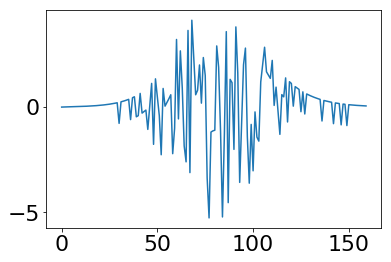

In [115]:
plt.plot(result.residual.reshape(time_series1.shape))
plt.show()

In [143]:
N=2618
#sigma=1/14
IS0=670
SE0=2
IE0=0
SI0=0
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0

INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
ts_len=len(measles_timeseries)

exp_period=0
def g(t, INP, ps):
    RES = spi.odeint(coinf_exp_model,INP,t,args=(ps,))
    #res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    ######res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    res_measles=RES[1+exp_period:ts_len+1,10]-RES[0+exp_period:ts_len,10]
    
    x=res_measles
    #x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps,INP, ts, data):
    #x0 = ps['x0'].value
    #model = g(ts, x0, ps)
    RES = spi.odeint(coinf_exp_model,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    #res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
#     index1, value = max(enumerate(res_measles), key=operator.itemgetter(1))
#     index2, value = max(enumerate(res_coinf), key=operator.itemgetter(1))
   # res_measles=RES[1+exp_period:ts_len+1,10]-RES[0+exp_period:ts_len,10] 
    model=res_measles[exp_period:ts_len]
 # ,index1,index2))
    return (model - data).ravel()

# a = 2.0
# b = 0.5
# true_params = [a, b]
# x0 = 10.0

TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
#time_series=np.array((measles_ts_smooth,coinf_ts_smooth))
#time_series=np.array((measles_timeseries,coinf_timeseries))
time_series1=measles_timeseries+coinf_timeseries

time_series1=time_series1[exp_period:ts_len]
#time_series=np.array((measles_timeseries,coinf_timeseries,71,88))
# t = np.linspace(0, 10, 10)
# data = g(t, x0, true_params)
# data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('beta0',value=1.2,min=0.1,max=3)
params.add('beta1',value=0.4,min=0.1,max=5)
params.add('gamma0',value=0.1,min=0.001,max=0.9)
params.add('gamma1',value=0.1,min=1/30,max=1/2)
params.add('c1',value=0.01,min=0.001,max=0.3)
params.add('c2',value=0.1,min=0.001,max=0.3)
params.add('c3',value=0.1,min=0.001,max=0.3)
params.add('sigma',value=0.1,min=1/21,max=1/7)
params.add('omega0',value=1,min=1/25,max=1/3)
params.add('omega1',value=0.1,min=1/20,max=1/2)


# params.add('x0', value=float(data[0]), min=0, max=100)
# params.add('a', value= 1.0, min=0, max=10)
# params.add('b', value= 1.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(INPUT,t_range, time_series1), method='leastsq')
final = time_series1 + result.residual.reshape(time_series1.shape)


# beta0,beta1,gamma0,gamma1,c=1.2,1.2,0.1,0.1,0.1
# true_params = np.array((beta0,beta1,gamma0,gamma1,c))
# data = g(t_range, INPUT, true_params)
# data += np.random.normal(size=data.shape)
# result = minimize(residual, params, args=(INPUT,t_range, data), method='leastsq')
# final = data + result.residual.reshape(data.shape)


# plot data and fitted curves
# plt.plot(t, data, 'o')
# plt.plot(t, final, '--', linewidth=2, c='blue');

# # display fitted statistics
# report_fit(result)

In [144]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 160
    # variables        = 10
    chi-square         = 406.601240
    reduced chi-square = 2.71067493
    Akaike info crit   = 169.225462
    Bayesian info crit = 199.977200
[[Variables]]
    beta0:   0.84256807 (init = 1.2)
    beta1:   1.35470198 (init = 0.4)
    gamma0:  0.37366446 (init = 0.1)
    gamma1:  0.43705103 (init = 0.1)
    c1:      0.29999541 (init = 0.01)
    c2:      0.16656741 (init = 0.1)
    c3:      0.10000000 (init = 0.1)
    sigma:   0.04773185 (init = 0.1)
    omega0:  0.27565027 (init = 0.3333333)
    omega1:  0.10000000 (init = 0.1)


In [145]:
result.params.pretty_print()

Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
beta0     0.8426      0.1        3     None     True     None     None
beta1      1.355      0.1        5     None     True     None     None
c1           0.3    0.001      0.3     None     True     None     None
c2        0.1666    0.001      0.3     None     True     None     None
c3           0.1    0.001      0.3     None     True     None     None
gamma0    0.3737    0.001      0.9     None     True     None     None
gamma1    0.4371  0.03333      0.5     None     True     None     None
omega0    0.2757     0.04   0.3333     None     True     None     None
omega1       0.1     0.05      0.5     None     True     None     None
sigma    0.04773  0.04762   0.1429     None     True     None     None


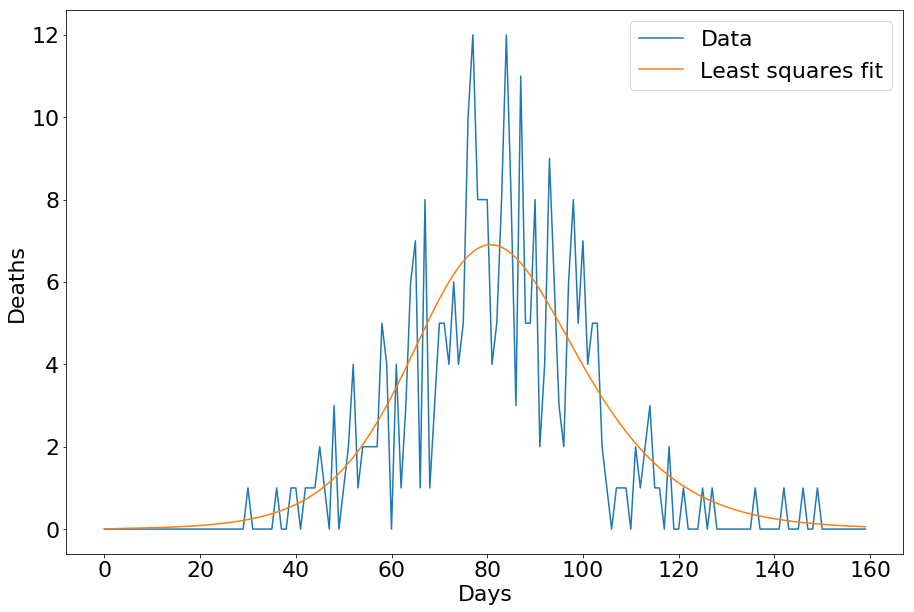

In [130]:
plt.figure(figsize=(15,10))
#RES = spi.odeint(coinf_exp_model,INPUT,t_range,result.params())
#plt.plot(RES[:,5])
plt.rcParams.update({'font.size': 22})
plt.plot(time_series1,label="Data")
ts_smooth=savgol_filter(time_series1, 51, 3)
#plt.plot(ts_smooth,label="smoothed data")
plt.plot(final,label="Least squares fit")
#plt.plot(final[1],label="fit to coinfection")
measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
#plt.plot(measles_ts_smooth)

# beta0,beta1,gamma0,gamma1,c=1.2,1.5,0.1,0.1,0.3
# true_params = np.array((beta0,beta1,gamma0,gamma1,c))
# data = g(t_range, INPUT, true_params)
#data += np.random.normal(size=data.shape)
# plt.plot(data[0],label="Measles")
# plt.plot(data[1],label="coinf")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Deaths")
plt.show()

In [118]:
index

71

In [45]:
len(measles_timeseries)

155

In [150]:
# def f(xs, t, ps):
#     """Receptor synthesis-internalization model."""
#     try:
#         a = ps['a'].value
#         b = ps['b'].value
#     except:
#         a, b = ps
#     x = xs

#     return a - b*x
#omega=np.array([1/10,1/10])
N=2618
#sigma=1/14
IS0=670
SE0=2
IE0=0
SI0=0
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
ts_len=len(measles_timeseries)
def g(t, INP, ps):
    RES = spi.odeint(coinf_exp_model,INP,t,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    
    x=np.array((res_measles,res_coinf))
    #x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps,INP, ts, data):
    #x0 = ps['x0'].value
    #model = g(ts, x0, ps)
    RES = spi.odeint(coinf_exp_model,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
#     index1, value = max(enumerate(res_measles), key=operator.itemgetter(1))
#     index2, value = max(enumerate(res_coinf), key=operator.itemgetter(1))
     
    model=np.array((res_measles,res_coinf))
 # ,index1,index2))
    return (model - data).ravel()

# a = 2.0
# b = 0.5
# true_params = [a, b]
# x0 = 10.0

TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
#time_series=np.array((measles_ts_smooth,coinf_ts_smooth))
time_series=np.array((measles_timeseries,coinf_timeseries))
#time_series=np.array((measles_timeseries,coinf_timeseries,71,88))
# t = np.linspace(0, 10, 10)
# data = g(t, x0, true_params)
# data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('beta0',value=1.2,min=0.1,max=3)
params.add('beta1',value=0.4,min=0.1,max=5)
params.add('gamma0',value=0.1,min=0.01,max=0.9)
params.add('gamma1',value=0.1,min=1/21,max=1/3)
params.add('c1',value=0.1,min=0.001,max=0.3)
params.add('c2',value=0.1,min=0.001,max=0.3)
params.add('c3',value=0.1,min=0.001,max=0.3)
params.add('sigma',value=0.1,min=1/21,max=1/4)
params.add('omega0',value=0.1,min=1/21,max=1/4)
params.add('omega1',value=0.1,min=1/20,max=1/2)
#params.add('alpha0',value=0.9,min=0.9,max=1)
#params.add('alpha1',value=0.9,min=0.9,max=1)

# params.add('x0', value=float(data[0]), min=0, max=100)
# params.add('a', value= 1.0, min=0, max=10)
# params.add('b', value= 1.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(INPUT,t_range, time_series), method='leastsq')
final = time_series + result.residual.reshape(time_series.shape)


# beta0,beta1,gamma0,gamma1,c=1.2,1.2,0.1,0.1,0.1
# true_params = np.array((beta0,beta1,gamma0,gamma1,c))
# data = g(t_range, INPUT, true_params)
# data += np.random.normal(size=data.shape)
# result = minimize(residual, params, args=(INPUT,t_range, data), method='leastsq')
# final = data + result.residual.reshape(data.shape)


# plot data and fitted curves
# plt.plot(t, data, 'o')
# plt.plot(t, final, '--', linewidth=2, c='blue');

# # display fitted statistics
# report_fit(result)

In [134]:
#data

In [54]:
#result.residual

In [146]:
result.params.valuesdict()['beta0']


0.043142972534329437

In [151]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 286
    # data points      = 320
    # variables        = 10
    chi-square         = 424.163911
    reduced chi-square = 1.36827068
    Akaike info crit   = 110.175669
    Bayesian info crit = 147.858879
[[Variables]]
    beta0:   0.39497869 (init = 1.2)
    beta1:   0.46177899 (init = 0.4)
    gamma0:  0.40142624 (init = 0.1)
    gamma1:  0.18387245 (init = 0.1)
    c1:      0.03401717 (init = 0.1)
    c2:      0.30000000 (init = 0.1)
    c3:      0.10000000 (init = 0.1)
    sigma:   0.14285688 (init = 0.1)
    omega0:  0.12817527 (init = 0.1)
    omega1:  0.10000000 (init = 0.1)


In [152]:
result.params.pretty_print()

Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
beta0      0.395      0.1        3     None     True     None     None
beta1     0.4618      0.1        5     None     True     None     None
c1       0.03402    0.001      0.3     None     True     None     None
c2           0.3    0.001      0.3     None     True     None     None
c3           0.1    0.001      0.3     None     True     None     None
gamma0    0.4014     0.01      0.9     None     True     None     None
gamma1    0.1839  0.04762   0.3333     None     True     None     None
omega0    0.1282  0.04762     0.25     None     True     None     None
omega1       0.1     0.05      0.5     None     True     None     None
sigma     0.1429  0.04762     0.25     None     True     None     None


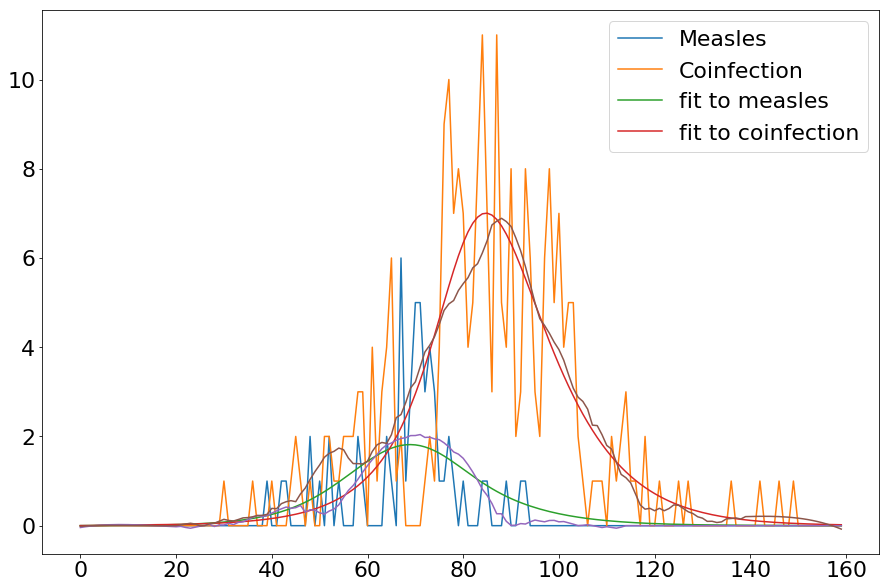

In [153]:
plt.figure(figsize=(15,10))
#RES = spi.odeint(coinf_exp_model,INPUT,t_range,result.params())
#plt.plot(RES[:,5])
plt.plot(time_series[0],label="Measles")
plt.plot(time_series[1],label="Coinfection")
plt.plot(final[0],label="fit to measles")
plt.plot(final[1],label="fit to coinfection")
measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
plt.plot(measles_ts_smooth)
plt.plot(coinf_ts_smooth)
# beta0,beta1,gamma0,gamma1,c=1.2,1.5,0.1,0.1,0.3
# true_params = np.array((beta0,beta1,gamma0,gamma1,c))
# data = g(t_range, INPUT, true_params)
#data += np.random.normal(size=data.shape)
# plt.plot(data[0],label="Measles")
# plt.plot(data[1],label="coinf")
plt.legend()
plt.show()

# Visualisation

In [16]:
def model_ts(ts_length,i,lh,INP):
    beta=np.array([lh[i,0],lh[i,1]])
    gamma0=lh[i,2]
    gamma1=lh[i,3]
    sigma=lh[i,4]
    omega=np.array([lh[i,5],lh[i,5]])
    c1=lh[i,6]
    c2=lh[i,7]
    mu=np.array([c1*omega[0],c2*omega[1],c2*gamma1])
    
    RES = spi.odeint(coinf_exp1_model,INP,t_range,beta,gamma0,gamma1,sigma,omega,mu)
    res_measles=RES[1:ts_length+1,10]-RES[0:ts_length,10]
    res_coinf=RES[1:ts_length+1,11]-RES[0:ts_length,11]
    
    x=np.array((res_measles,res_coinf))
    return x   

def sq_calc(model,data):

    return np.square((model-data).ravel())

In [40]:
a=np.array([[2,4,6],[1,2,3]])
b=np.array([[10,4,3],[2,5,3]])

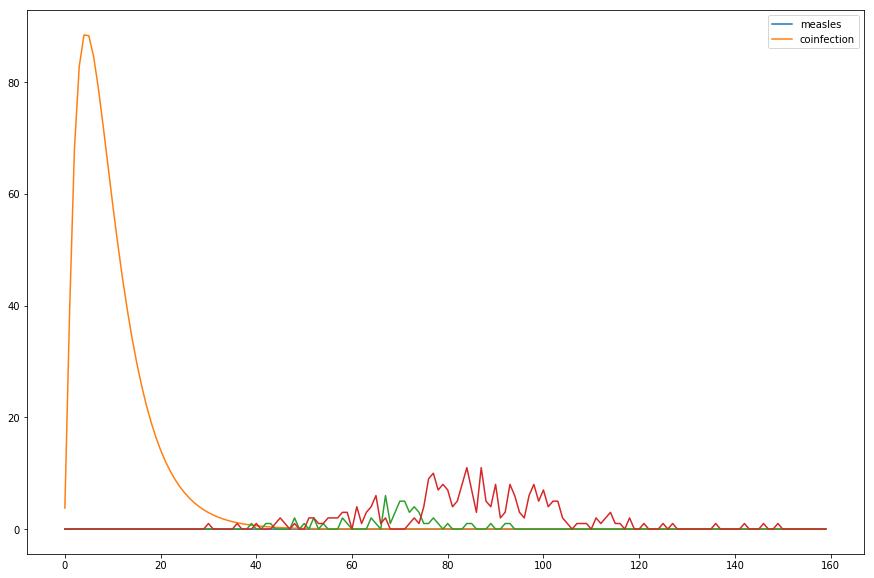

In [55]:
plt.figure(figsize=(15,10))
plt.plot(x[0],label='measles')
plt.plot(x[1],label='coinfection')
plt.plot(time_series[0])
plt.plot(time_series[1])
plt.legend()
plt.show()

In [30]:
np.shape(lh)

(10, 8)

In [17]:
samps=10000
lh=lhs(8,samples=samps)
N=2618
IS0=670
SE0=2
IE0=0
SI0=0
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
ts_len=len(measles_timeseries)
TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
sq=np.zeros(samps)
time_series=np.array((measles_timeseries,coinf_timeseries))

for i in range(samps):
    beta=np.array([lh[i,0],lh[i,1]])
    gamma0=lh[i,2]
    gamma1=lh[i,3]
    sigma=lh[i,4]
    omega=np.array([lh[i,5],lh[i,5]])
    c1=lh[i,6]
    c2=lh[i,7]
    mu=np.array([c1*omega[0],c2*omega[1],c2*gamma1])
    
    RES = spi.odeint(coinf_exp1_model,INPUT,t_range)
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    
    x=np.array((res_measles,res_coinf))
    sq[i]=sum(sq_calc(x,time_series))
    

/home/susanna/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [19]:
sq[i]

118804628.31748429

In [18]:
for i in range(samps):
    if sq[i]<600:
        print(i)

In [20]:
min(sq)

1196.7620972949971

In [53]:
beta0=0.98784668 
beta1=0.33159226 
gamma0= 0.34799231
gamma1=  0.24078635 
c1=  0.06799435
c2=      0.07178437
c3=      0.10000000 
sigma=   0.16058352 
omega0=  0.11031387
omega1=  0.10000000 
IS0=670
SE0=2
IE0=0
SI0=0
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)

In [54]:
RES = spi.odeint(coinf_exp1_model,INPUT,t_range)
res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]

x=np.array((res_measles,res_coinf))

In [42]:
residual=(x-time_series).ravel()

In [45]:
residual

array([  1.95665330e-03,   1.92289927e-02,   3.11251502e-02,
         3.58785131e-02,   3.67695728e-02,   3.55857613e-02,
         3.33306874e-02,   3.05783450e-02,   2.76597448e-02,
         2.47651166e-02,   2.20015535e-02,   1.94262720e-02,
         1.70661889e-02,   1.49296731e-02,   1.30137491e-02,
         1.13086137e-02,   9.80052899e-03,   8.47371394e-03,
         7.31159766e-03,   6.29764741e-03,   5.41590982e-03,
         4.65135028e-03,   3.99004791e-03,   3.41929325e-03,
         2.92760907e-03,   2.50472644e-03,   2.14152565e-03,
         1.82995973e-03,   1.56296519e-03,   1.33437016e-03,
         1.13880212e-03,   9.71599372e-04,   8.28728736e-04,
         7.06707956e-04,   6.02537953e-04,   5.13638450e-04,
         4.37794009e-04,   3.73104211e-04,   3.17940715e-04,
        -9.99729090e-01,   2.30818251e-04,   1.96647518e-04,
        -9.99832474e-01,  -9.99857289e-01,   1.21567045e-04,
         1.03552135e-04,   8.82043203e-05,   7.51294306e-05,
        -1.99993601e+00,

In [ ]:
for i in range(160):

In [33]:
sum(np.square(x-time_series).ravel())

67308.36024955989

In [34]:
chi_sq_f=sum(sq_calc(x,time_series))

In [35]:
chi_sq_f

67308.36024955989

In [24]:
lh[836,:]

array([  3.49021347e-02,   8.30281860e-01,   2.15042206e-01,
         6.67699514e-01,   8.50569895e-01,   8.74136164e-04,
         9.14773360e-01,   3.59822265e-01])

In [21]:
np.where(sq==1196.7620972949971)

(array([836]),)

In [ ]:
plt.figure(figsize=(15,10))


In [35]:
#model_ts(ts_len,1,lh,INPUT)

In [12]:
samps=2
lh=lhs(8,samples=samps)

In [16]:
lh[:,0]

array([ 0.81211425,  0.38388263])

In [36]:
sq

array([ 1354.08323565,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ])

In [65]:
N=2618
#sigma=1/14
IS0=600
RS0=0
SE0=2
IE0=0
RE0=0
SI0=0
II0=0
RI0=0
SX0=0
IX0=0
RX0=0
SR0=0
IR0=0
RR0=0
SS0=N-IS0-SE0-RS0
INPUT=(SS0,IS0,RS0,SE0,IE0,RE0,SI0,II0,RI0,SX0,IX0,RX0,SR0,IR0,RR0,0,0)
ts_len=len(measles_timeseries)
def g(t, INP, ps):
    RES = spi.odeint(coinf_sirs_model,INP,t,args=(ps,))
    res_measles=RES[1:ts_len+1,15]-RES[0:ts_len,15]
    res_coinf=RES[1:ts_len+1,16]-RES[0:ts_len,16]
    
    x=np.array((res_measles,res_coinf))
    #x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps,INP, ts, data):
    #x0 = ps['x0'].value
    #model = g(ts, x0, ps)
    RES = spi.odeint(coinf_sirs_model,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,15]-RES[0:ts_len,15]
    res_coinf=RES[1:ts_len+1,16]-RES[0:ts_len,16]
    
    model=np.array((res_measles,res_coinf))
    return (model - data).ravel()

# a = 2.0
# b = 0.5
# true_params = [a, b]
# x0 = 10.0

TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
#time_series=np.array((measles_ts_smooth,coinf_ts_smooth))
time_series=np.array((measles_timeseries,coinf_timeseries))
# t = np.linspace(0, 10, 10)
# data = g(t, x0, true_params)
# data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('beta0',value=1.2,min=0.01,max=5)
params.add('beta1',value=0.5,min=0.01,max=5)
params.add('gamma0',value=0.1,min=0.001,max=0.9)
params.add('gamma1',value=0.1,min=0.01,max=0.9)
params.add('c1',value=0.1,min=0.0001,max=0.9)
params.add('c2',value=0.1,min=0.0001,max=0.9)
params.add('c3',value=0.1,min=0.0001,max=0.9)
params.add('c4',value=0.1,min=0.0001,max=0.9)
params.add('sigma',value=0.1,min=1/12,max=1/4)
params.add('omega',value=0.1,min=1/12,max=1/4)
#params.add('omega1',value=0.1,min=1/20,max=1/2)
params.add('delta0',value=0.5,min=0.001,max=1)
#params.add('alpha1',value=0.1,min=0,max=1)

# params.add('x0', value=float(data[0]), min=0, max=100)
# params.add('a', value= 1.0, min=0, max=10)
# params.add('b', value= 1.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(INPUT,t_range, time_series), method='leastsq')
final = time_series + result.residual.reshape(time_series.shape)


# beta0,beta1,gamma0,gamma1,c=1.2,1.2,0.1,0.1,0.1
# true_params = np.array((beta0,beta1,gamma0,gamma1,c))
# data = g(t_range, INPUT, true_params)
# data += np.random.normal(size=data.shape)
# result = minimize(residual, params, args=(INPUT,t_range, data), method='leastsq')
# final = data + result.residual.reshape(data.shape)


# plot data and fitted curves
# plt.plot(t, data, 'o')
# plt.plot(t, final, '--', linewidth=2, c='blue');

# # display fitted statistics
# report_fit(result)

/home/susanna/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [66]:
result.params.pretty_print()

Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
beta0      1.173     0.01        5    0.311     True     None     None
beta1     0.3393     0.01        5    0.197     True     None     None
c1        0.8381   0.0001      0.9   0.3747     True     None     None
c2      0.0003238   0.0001      0.9 0.0007356     True     None     None
c3       0.04452   0.0001      0.9  0.08011     True     None     None
c4       0.06402   0.0001      0.9  0.01343     True     None     None
delta0    0.5018    0.001        1 0.0001234     True     None     None
gamma0   0.04163    0.001      0.9  0.07807     True     None     None
gamma1    0.3336     0.01      0.9  0.03209     True     None     None
omega    0.09637  0.08333     0.25 0.001449     True     None     None
sigma     0.2156  0.08333     0.25 0.004287     True     None     None


In [64]:
result.residual

array([  3.42648126e-06,   2.75538953e-05,   1.10904961e-04,
         3.79589891e-04,   1.21350325e-03,   3.66183372e-03,
         1.00397644e-02,   2.30800004e-02,   4.19606031e-02,
         6.24840731e-02,   8.23680741e-02,   1.01278158e-01,
         1.19241110e-01,   1.36304265e-01,   1.52513573e-01,
         1.67912414e-01,   1.82541540e-01,   1.96439304e-01,
         2.09641881e-01,   2.22183491e-01,   2.34096557e-01,
         2.45411848e-01,   2.56158587e-01,   2.66364552e-01,
         2.76056150e-01,   2.85258483e-01,   2.93995431e-01,
         3.02289709e-01,   3.10162921e-01,   3.17635619e-01,
         3.24727346e-01,   3.31456693e-01,   3.37841341e-01,
         3.43898118e-01,   3.49643036e-01,   3.55091337e-01,
         3.60257417e-01,   3.65155132e-01,   3.69797563e-01,
        -6.25802843e-01,   3.78365790e-01,   3.82314735e-01,
        -6.13945302e-01,  -6.10404107e-01,   3.92948036e-01,
         3.96120351e-01,   3.99121620e-01,   4.01960201e-01,
        -1.59535596e+00,

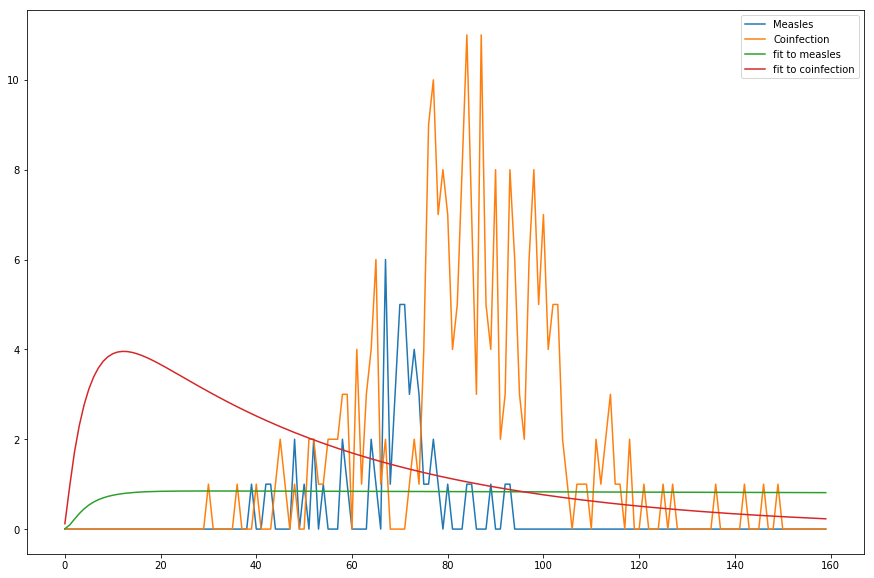

In [67]:
plt.figure(figsize=(15,10))
plt.plot(time_series[0],label="Measles")
plt.plot(time_series[1],label="Coinfection")
plt.plot(final[0],label="fit to measles")
plt.plot(final[1],label="fit to coinfection")
# measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
# coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
# plt.plot(measles_ts_smooth)
# plt.plot(coinf_ts_smooth)
# beta0,beta1,gamma0,gamma1,c=1.2,1.5,0.1,0.1,0.3
# true_params = np.array((beta0,beta1,gamma0,gamma1,c))
# data = g(t_range, INPUT, true_params)
#data += np.random.normal(size=data.shape)
# plt.plot(data[0],label="Measles")
# plt.plot(data[1],label="coinf")
plt.legend()
plt.show()

In [ ]:
lhs()

In [52]:
true_params=(1,1,0.1,0.1,0.01)

In [54]:
# a, b, c, d = 3,1,1,1
beta0,beta0,gamma0,gamma1,c=1,1,0.1,0.1,0.01
true_params = np.array((beta0,beta0,gamma0,gamma1,c))

In [72]:
data = g(t_range, INPUT, true_params)
data += np.random.normal(size=data.shape)

In [78]:
np.shape(data)

(2, 150)

In [17]:
# final = time_series + result.residual.reshape(time_series.shape)

# # # plot data and fitted curves
# # plt.plot(t_range, data, 'o')
# # plt.plot(t_range, final, '--', linewidth=2, c='blue');

# # # display fitted statistics
# # report_fit(result)

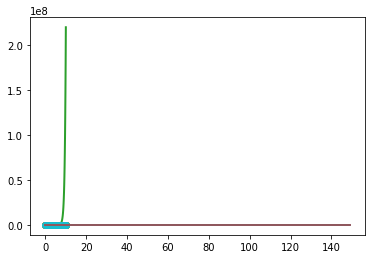

In [66]:
[measles_timeseries,coinf_timeseries]

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  2.,
         1.,  0.,  6.,  1.,  3.,  5.,  5.,  3.,  4.,  3.,  1.,  1.,  2.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
    

In [59]:
#g(t_range,INPUT,true_params)

In [79]:
result = minimize(residual, params, args=(INPUT,t_range, data), method='leastsq')

/home/susanna/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [53]:
RES = spi.odeint(coinf_exp_model,INPUT,t_range,args=(true_params))
res_measles=RES[1:151,10]-RES[0:150,10]
res_coinf=RES[1:151,11]-RES[0:150,11]


TypeError: coinf_exp_model() takes 3 positional arguments but 7 were given

In [31]:
params

Parameters([('beta0', <Parameter 'beta0', 1.2, bounds=[0.05:5]>),
            ('beta1', <Parameter 'beta1', 1.2, bounds=[0.05:5]>),
            ('gamma0', <Parameter 'gamma0', 0.1, bounds=[0.01:0.5]>),
            ('gamma1', <Parameter 'gamma1', 0.1, bounds=[0.01:0.5]>),
            ('c', <Parameter 'c', 0.1, bounds=[0.0001:0.5]>)])

In [180]:
lhs(10,100)

array([[ 0.26789255,  0.21085807,  0.37300322,  0.11902312,  0.92249102,
         0.92128716,  0.30085512,  0.21010558,  0.85933993,  0.93252355],
       [ 0.54186984,  0.29161558,  0.5050908 ,  0.62408639,  0.76006721,
         0.539284  ,  0.54762462,  0.58669669,  0.12563126,  0.77177476],
       [ 0.93835852,  0.48228146,  0.32854502,  0.10818188,  0.22904435,
         0.49219871,  0.16587127,  0.34010872,  0.60930424,  0.89718728],
       [ 0.71730892,  0.02860822,  0.65583778,  0.76070626,  0.82747838,
         0.98002344,  0.10898744,  0.66285972,  0.37026501,  0.50973044],
       [ 0.66706706,  0.93593068,  0.7943218 ,  0.88922652,  0.66272722,
         0.19290181,  0.97600476,  0.87245123,  0.16683128,  0.0220353 ],
       [ 0.0971666 ,  0.91125159,  0.48203461,  0.12857278,  0.11192929,
         0.20960397,  0.69761576,  0.41202342,  0.06364908,  0.04527204],
       [ 0.32569254,  0.73694636,  0.53774336,  0.61259814,  0.41358808,
         0.28779114,  0.9868807 ,  0.602254  

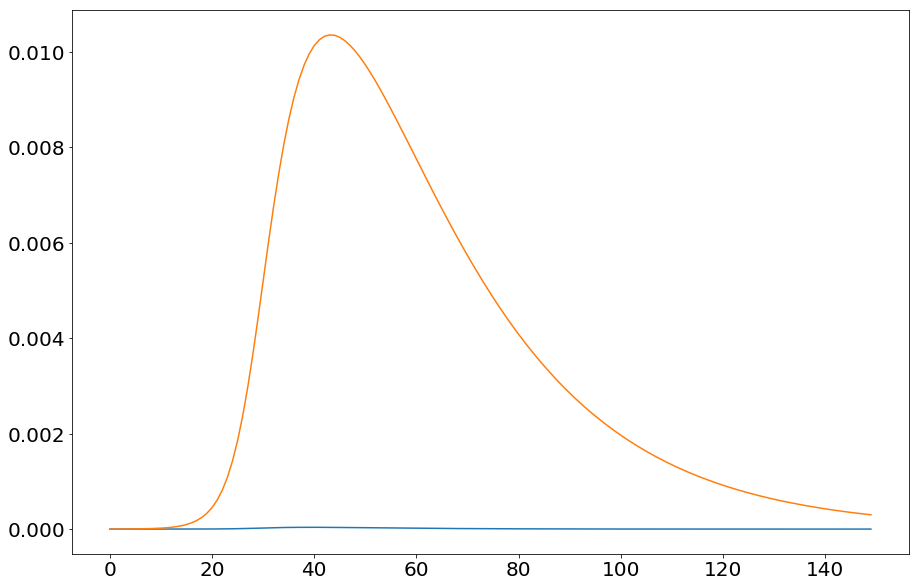

In [34]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
a=np.zeros(1)
only_measles=np.hstack((a,RES[1:150,10]-RES[0:149,10]))
both_co=np.hstack((a,RES[1:150,11]-RES[0:149,11]))
#plt.plot(coinf_timeseries)
#plt.plot(measles_timeseries)
plt.plot(only_measles,label="Measles")
plt.plot(both_co,label="Measles and pathogen")

plt.show()

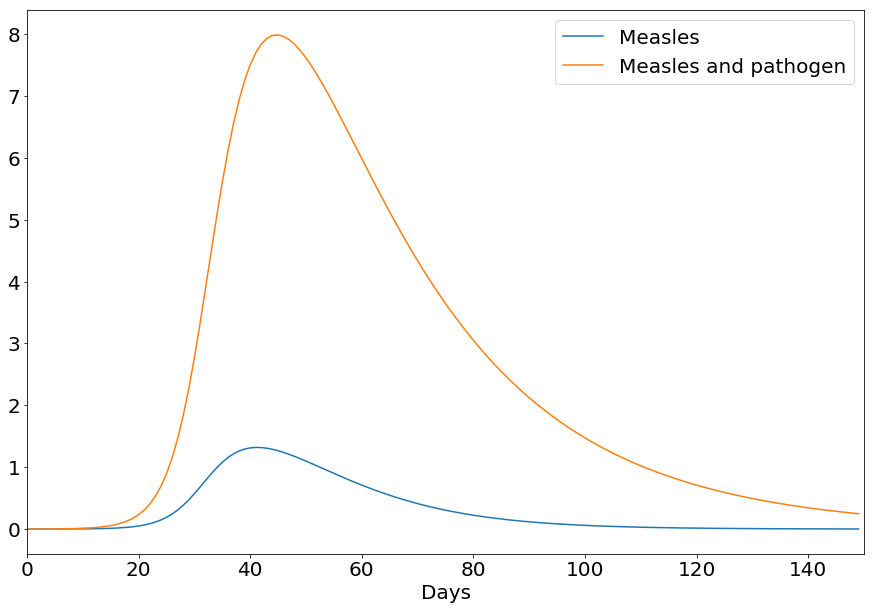

In [105]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
#plt.plot(values3)
#plt.plot(values2)
got_measles=RES[:,2]+RES[:,3]+RES[:,4]+RES[:,5]+RES[:,6]+RES[:,7]+RES[:,8]+RES[:,9]
#plt.plot(got_measles,label="measles all")
#plt.plot(RES[:,4],label=("SI-only measles"))
# plt.plot(RES[:,6],label=("SI-only measles"))

#plt.plot(RES[:,2],label=("SE-only measles"))
#plt.plot(RES[:,5],label=("II"))
                         #X-immuno suppressed infected "))
plt.plot(only_measles,label="Measles")
plt.plot(both_co,label="Measles and pathogen")
#plt.plot(RES[1:150,8]-RES[0:149,8],label=("SI-only measles"))
#plt.plot(RES[1:150,9]-RES[0:149,9],label=("coinfected"))
#plt.plot(values4)
#plt.plot(values5)
plt.legend()
#plt.ylabel("Deaths")
plt.xlim((0,150))
plt.xlabel('Days')
plt.show()